In [30]:
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

# Import Policy Network from baselines
from stable_baselines3 import PPO

# Setup game
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [3]:
# Test environment with random actions
done = True
env.reset()
# Render env with random actions, 5 times
for i in range(5):
    # Go through episode
    for j in range(5000):
        env.render() 
        # Random action
        observation, reward, done, info = env.step(env.action_space.sample())
        if done: 
            # Start the game
            env.reset()
# Close the game
env.close()

C:\Users\soner\AppData\Local\Programs\Python\Python310\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))
C:\Users\soner\AppData\Local\Programs\Python\Python310\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


In [4]:
# Import packages to improve performace

# Turn image to grayscale
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from matplotlib import pyplot as plt


In [5]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# get simple movements
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# apply grayscaling
env = GrayScaleObservation(env, keep_dim=True)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')

In [15]:
state = env.reset()

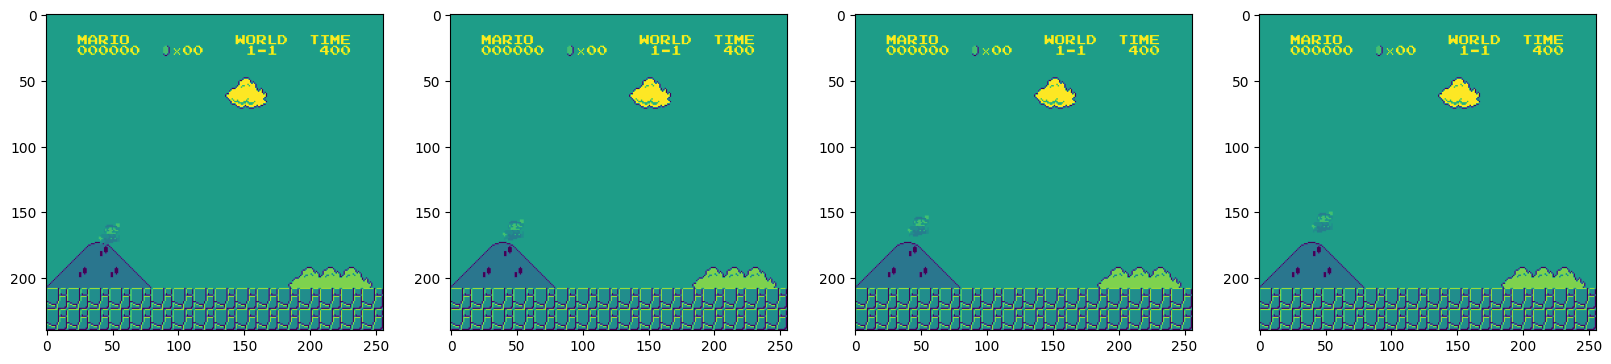

In [28]:
# Plot mario jumping, seeing what happens
state, reward, done, info = env.step([5])

plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

In [106]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True


In [108]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [110]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=100000, save_path=CHECKPOINT_DIR)

In [113]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, 
            n_steps=512) 

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [114]:
# Train the AI model, this is where the AI model starts to learn
model.learn(total_timesteps=1000000, callback=callback)

Logging to ./logs/PPO_5
----------------------------
| time/              |     |
|    fps             | 234 |
|    iterations      | 1   |
|    time_elapsed    | 2   |
|    total_timesteps | 512 |
----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 145          |
|    iterations           | 2            |
|    time_elapsed         | 7            |
|    total_timesteps      | 1024         |
| train/                  |              |
|    approx_kl            | 3.564637e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.95        |
|    explained_variance   | -0.00597     |
|    learning_rate        | 1e-06        |
|    loss                 | 105          |
|    n_updates            | 10           |
|    policy_gradient_loss | -6.05e-05    |
|    value_loss           | 305          |
------------------------------------------

KeyboardInterrupt: 

In [54]:
# Load latest model
model = PPO.load('./train/best_model_1000000'

In [97]:
state = env.reset()

In [96]:
print(SIMPLE_MOVEMENT)

[['NOOP'], ['right'], ['right', 'A'], ['right', 'B'], ['right', 'A', 'B'], ['A'], ['left']]


In [98]:
print(model.predict(state.copy()))

(array(3, dtype=int64), None)


In [100]:
model.predict(state.copy())

(array(3, dtype=int64), None)

In [105]:
# Test model, start game
obs = env.reset()
# Simulate 5 games
while True:
    action = [model.predict(obs.copy())]
    obs, reward, done, info = env.step(action)
    env.render()

3


TypeError: unhashable type: 'numpy.ndarray'